In [1]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt

In [42]:
DO03 = pd.read_excel('01 AD+DO03.xlsx', index_col=0)
DO09 = pd.read_excel('02 AD+DO09.xlsx', index_col=0)
DO09_w_DA = pd.read_excel('AD+DO09+DA.xlsx', index_col=0)

In [5]:
DO03.head(3)

,loss,acc,val_loss,val_acc
0,1.226612,0.678288,0.825364,0.758653
1,0.258897,0.931038,0.602081,0.839952
2,0.118829,0.968415,0.564994,0.865295


In [7]:
DO09.head(3)

,loss,acc,val_loss,val_acc
0,1.647336,0.541202,1.051094,0.707203
1,0.630881,0.814062,0.699640,0.805511
2,0.400297,0.881858,0.594640,0.836976


In [43]:
DO09_w_DA.head(3)

,loss,acc,val_loss,val_acc
0,0.584720,0.830397,2.192652,0.520795
1,0.537183,0.842979,2.177213,0.529862
2,0.504127,0.853951,2.238311,0.530334


In [44]:
print(DO03.shape)
print(DO09.shape)
print(DO09_w_DA.shape)

(5, 4)
(5, 4)
(4, 4)


### Plot accuracies

#### Create a DF to plot the accuracies (train and val)

In [48]:
# Initialize an empty df
final_acc = pd.DataFrame()

In [49]:
# List the columns the df will have
final_acc_columns = ['Train Acc 03', 'Train Acc 09', 'Train Acc 09 DA', 'Val Acc 03', 'Val Acc 09', 'Val Acc 09 DA']

In [50]:
# Create the columns
for column in final_acc_columns:
    final_acc[column] = None

In [51]:
# Confirm they were correctly created
final_acc

,Train Acc 03,Train Acc 09,Train Acc 09 DA,Val Acc 03,Val Acc 09,Val Acc 09 DA


In [54]:
# Add training accuracy values
final_acc['Train Acc 03'] = DO03['acc']
final_acc['Train Acc 09'] = DO09['acc']
final_acc['Train Acc 09 DA'] = DO09_w_DA['acc']

# Add val accuracy values
final_acc['Val Acc 03'] = DO03['val_acc']
final_acc['Val Acc 09'] = DO09['val_acc']
final_acc['Val Acc 09 DA'] = DO09_w_DA['acc']

In [55]:
final_acc

,Train Acc 03,Train Acc 09,Train Acc 09 DA,Val Acc 03,Val Acc 09,Val Acc 09 DA
0,0.678288,0.541202,0.830397,0.758653,0.707203,0.830397
1,0.931038,0.814062,0.842979,0.839952,0.805511,0.842979
2,0.968415,0.881858,0.853951,0.865295,0.836976,0.853951
3,0.982441,0.911439,0.863357,0.875415,0.848116,0.863357
4,0.988816,0.929435,NaN,0.887661,0.846756,NaN


#### Plots

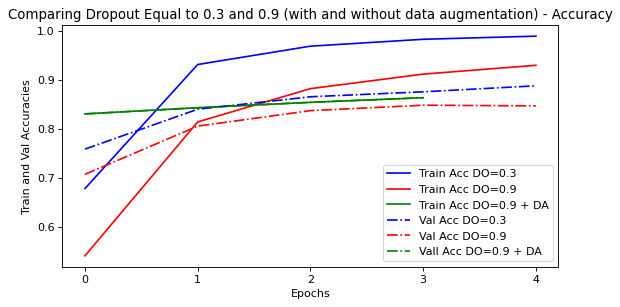

In [57]:
# define area
plt.figure(figsize=(8, 4), dpi=80)

# define x axis
x = final_acc.index
  
# plot lines
plt.plot(x, final_acc['Train Acc 03'], label = "Train Acc DO=0.3", color='blue')
plt.plot(x, final_acc['Train Acc 09'], label = "Train Acc DO=0.9", color='red')
plt.plot(x, final_acc['Train Acc 09 DA'], label = "Train Acc DO=0.9 + DA", color='green')
plt.plot(x, final_acc['Val Acc 03'], label = "Val Acc DO=0.3", color='blue', linestyle='-.')
plt.plot(x, final_acc['Val Acc 09'], label = "Val Acc DO=0.9", color='red', linestyle='-.')
plt.plot(x, final_acc['Val Acc 09 DA'], label = "Vall Acc DO=0.9 + DA", color='green', linestyle='-.')
plt.xticks(np.arange(0, 5, 1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Accuracies")
plt.title("Comparing Dropout Equal to 0.3 and 0.9 (with and without data augmentation) - Accuracy")
plt.show()

### Plot loss values

#### Create a df to plot loss values

In [33]:
# Initialize an empty df
final_loss = pd.DataFrame()

In [35]:
# List the columns the df will have
final_loss_columns = ['Train Loss 03', 'Train Loss 09', 'Val Loss 03', 'Val Loss 09']

In [36]:
# Create the columns
for column in final_loss_columns:
    final_loss[column] = None

In [37]:
# Confirm they were correctly created
final_loss

,Train Loss 03,Train Loss 09,Val Loss 03,Val Loss 09


In [38]:
# Add training accuracy values
final_loss['Train Loss 03'] = DO03['loss']
final_loss['Train Loss 09'] = DO09['loss']

# Add val accuracy values
final_loss['Val Loss 03'] = DO03['val_loss']
final_loss['Val Loss 09'] = DO09['val_loss']

In [39]:
final_loss

,Train Loss 03,Train Loss 09,Val Loss 03,Val Loss 09
0,1.226612,1.647336,0.825364,1.051094
1,0.258897,0.630881,0.602081,0.699640
2,0.118829,0.400297,0.564994,0.594640
3,0.066607,0.306628,0.571185,0.548938
4,0.040366,0.246431,0.606713,0.559862


#### Plots

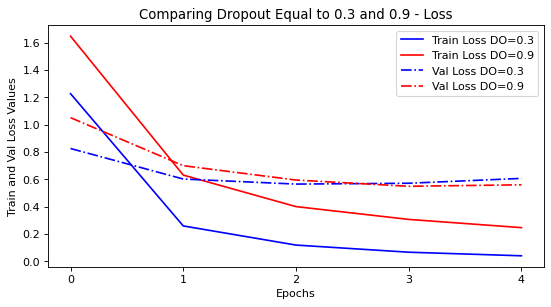

In [41]:
# define area
plt.figure(figsize=(8, 4), dpi=80)

# define x axis
x = final_loss.index
  
# plot lines
plt.plot(x, final_loss['Train Loss 03'], label = "Train Loss DO=0.3", color='blue')
plt.plot(x, final_loss['Train Loss 09'], label = "Train Loss DO=0.9", color='red')
plt.plot(x, final_loss['Val Loss 03'], label = "Val Loss DO=0.3", color='blue', linestyle='-.')
plt.plot(x, final_loss['Val Loss 09'], label = "Val Loss DO=0.9", color='red', linestyle='-.')
plt.xticks(np.arange(0, 5, 1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Loss Values")
plt.title("Comparing Dropout Equal to 0.3 and 0.9 - Loss")
plt.show()